#Library 📚

In [272]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [273]:
import pandas as pd
import string , re

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [274]:
path = '/content/drive/MyDrive/KELOMPOK 2 DEEP LEARNING/Data'

In [275]:
pip install pandas

##Read Data

In [276]:
#Membaca data
df = pd.read_csv(path + '/Updated_DataFrame_with_Corpus_Column.csv') # Added '/' between path and filename
print(df.shape)
df.head()

(243, 16)


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,corpus
0,1781692205125489024,Sat Apr 20 14:31:38 +0000 2024,15,Tak sedikit yang heran terhadap pria asing asa...,1781692205125489024,https://pbs.twimg.com/ext_tw_video_thumb/17816...,NaN,in,NaN,0,7,4,https://x.com/detikcom/status/1781692205125489024,69183155,detikcom,Tak sedikit yang heran terhadap pria asing asa...
1,1703955669261701153,Tue Sep 19 02:14:43 +0000 2023,0,Kabid Humas Polda Bali Kombes Jansen Avitus Pa...,1703955749427363894,NaN,lensaRTV,in,Indonesia,0,0,0,https://x.com/lensaRTV/status/1703955749427363894,2393930923,lensaRTV,Kabid Humas Polda Bali Kombes Jansen Avitus Pa...
2,1661377702987808768,Wed May 24 14:24:45 +0000 2023,2,Besok baca liputan kami di @hariankompas ya ka...,1661377702987808768,NaN,NaN,in,Magelang-Jogja-Jakarta-Bogor,0,0,1,https://x.com/JGBimantaraa/status/166137770298...,448618907,JGBimantaraa,Besok baca liputan kami di @hariankompas ya ka...
3,1644568135608172544,Sat Apr 08 05:09:32 +0000 2023,0,Pelaku menyerang korban di sebuah Kafe di Denp...,1644568135608172544,NaN,NaN,in,NaN,0,0,0,https://x.com/indojurnalid/status/164456813560...,1642416044303355904,indojurnalid,Pelaku menyerang korban di sebuah Kafe di Denp...
4,1639607147435798528,Sat Mar 25 12:36:21 +0000 2023,0,tribunnews: Tanggapi maraknya kasus turis naka...,1639607147435798528,NaN,NaN,in,"Jonggol, Indonesia",0,0,0,https://x.com/zkmachines/status/16396071474357...,2526805074,zkmachines,tribunnews: Tanggapi maraknya kasus turis naka...


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      243 non-null    int64 
 1   created_at               243 non-null    object
 2   favorite_count           243 non-null    int64 
 3   full_text                243 non-null    object
 4   id_str                   243 non-null    int64 
 5   image_url                28 non-null     object
 6   in_reply_to_screen_name  120 non-null    object
 7   lang                     243 non-null    object
 8   location                 98 non-null     object
 9   quote_count              243 non-null    int64 
 10  reply_count              243 non-null    int64 
 11  retweet_count            243 non-null    int64 
 12  tweet_url                243 non-null    object
 13  user_id_str              243 non-null    int64 
 14  username                 243 non-null    o

#Preprosessing  🐠

In [278]:
!pip install sastrawi
!pip install nltk
!pip install textblob


In [279]:
cols =['full_text','corpus']
df = df[cols]
print(df.shape)
df.head()

(243, 2)


,full_text,corpus
0,Tak sedikit yang heran terhadap pria asing asa...,Tak sedikit yang heran terhadap pria asing asa...
1,Kabid Humas Polda Bali Kombes Jansen Avitus Pa...,Kabid Humas Polda Bali Kombes Jansen Avitus Pa...
2,Besok baca liputan kami di @hariankompas ya ka...,Besok baca liputan kami di @hariankompas ya ka...
3,Pelaku menyerang korban di sebuah Kafe di Denp...,Pelaku menyerang korban di sebuah Kafe di Denp...
4,tribunnews: Tanggapi maraknya kasus turis naka...,tribunnews: Tanggapi maraknya kasus turis naka...


###**Punctuation**


```
untuk menghapus tanda baca
```


In [280]:
print(df.shape)
df.head()

(243, 2)


,full_text,corpus
0,Tak sedikit yang heran terhadap pria asing asa...,Tak sedikit yang heran terhadap pria asing asa...
1,Kabid Humas Polda Bali Kombes Jansen Avitus Pa...,Kabid Humas Polda Bali Kombes Jansen Avitus Pa...
2,Besok baca liputan kami di @hariankompas ya ka...,Besok baca liputan kami di @hariankompas ya ka...
3,Pelaku menyerang korban di sebuah Kafe di Denp...,Pelaku menyerang korban di sebuah Kafe di Denp...
4,tribunnews: Tanggapi maraknya kasus turis naka...,tribunnews: Tanggapi maraknya kasus turis naka...


In [281]:
df['corpus'] = df.corpus.str.translate(str.maketrans('', '', string.punctuation))
print(df.shape)
df.head()

(243, 2)


<ipython-input-281-c001285b4565>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['corpus'] = df.corpus.str.translate(str.maketrans('', '', string.punctuation))


,full_text,corpus
0,Tak sedikit yang heran terhadap pria asing asa...,Tak sedikit yang heran terhadap pria asing asa...
1,Kabid Humas Polda Bali Kombes Jansen Avitus Pa...,Kabid Humas Polda Bali Kombes Jansen Avitus Pa...
2,Besok baca liputan kami di @hariankompas ya ka...,Besok baca liputan kami di hariankompas ya kaw...
3,Pelaku menyerang korban di sebuah Kafe di Denp...,Pelaku menyerang korban di sebuah Kafe di Denp...
4,tribunnews: Tanggapi maraknya kasus turis naka...,tribunnews Tanggapi maraknya kasus turis nakal...


###**Slangword**



```
Untuk mengganti kata kata yang tidak formal menjadi formal atau baku
```


In [282]:
slang_dict = pd.read_csv(path+'/kamusalay.csv', encoding='latin1',names=['alay','normal'])
slang_dict = dict(zip(slang_dict.alay.tolist(),slang_dict.normal.tolist()))

In [283]:
def cvt_slang(sentence):
  return ''.join('').join(t for t in [slang_dict[x] if x in slang_dict.keys() else x for x in sentence.split()])

In [284]:
df['corpus'] = df.corpus.apply(cvt_slang)
print(df.shape)
df.head(10)

(243, 2)


,full_text,corpus
0,Tak sedikit yang heran terhadap pria asing asa...,TaksedikityangheranterhadappriaasingasalIndiai...
1,Kabid Humas Polda Bali Kombes Jansen Avitus Pa...,KabidHumasPoldaBaliKombesJansenAvitusPanjaitan...
2,Besok baca liputan kami di @hariankompas ya ka...,BesokbacaliputankamidihariankompasyakawansMauk...
3,Pelaku menyerang korban di sebuah Kafe di Denp...,PelakumenyerangkorbandisebuahKafediDenpasarSel...
4,tribunnews: Tanggapi maraknya kasus turis naka...,tribunnewsTanggapimaraknyakasusturisnakalKemen...
5,Tanggapi maraknya kasus turis nakal . Kemenkum...,TanggapimaraknyakasusturisnakalKemenkumhamBali...
6,Sebelumnya #WNA Tanzania itu diamankan oleh Sa...,SebelumnyaWNATanzaniaitudiamankanolehSatpolPPP...
7,Disepong Istri Orang Tog3e Gaya 69 https://t.c...,DisepongIstriOrangTog3eGaya69httpstcoYdIPJBABX...
8,Video bule diduga melakukan aksi perusakan seb...,Videobuledidugamelakukanaksiperusakansebuahrum...
9,cari pasangan buat swab sex kalo bisa bule #op...,caripasanganbuatswabsexkalaubisabuleopenboboba...


###Repetition Character


```
menghapus karaketer yang berlebihan pada kata
```

In [285]:
def repetition_char(txt):
  sub_str = re.findall(r"((\w)\2{2,})",txt)
  for x in sub_str:
    txt = txt.replace(x[0],x[1])
  return txt

In [286]:
df['corpus'] = df.corpus.apply(repetition_char)
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(243, 2)


,full_text,corpus
0,Tak sedikit yang heran terhadap pria asing asa...,TaksedikityangheranterhadappriaasingasalIndiai...
1,Kabid Humas Polda Bali Kombes Jansen Avitus Pa...,KabidHumasPoldaBaliKombesJansenAvitusPanjaitan...
2,Besok baca liputan kami di @hariankompas ya ka...,BesokbacaliputankamidihariankompasyakawansMauk...
3,Pelaku menyerang korban di sebuah Kafe di Denp...,PelakumenyerangkorbandisebuahKafediDenpasarSel...
4,tribunnews: Tanggapi maraknya kasus turis naka...,tribunnewsTanggapimaraknyakasusturisnakalKemen...


###**Stemming**


```
Mengubah menjadi kata dasarr
```


In [287]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Menerapkan stemming pada kolom 'corpus'
df['corpus'] = df['corpus'].apply(lambda x: stemmer.stem(str(x)))

print(df.shape)
df.head()


(243, 2)


,full_text,corpus
0,Tak sedikit yang heran terhadap pria asing asa...,taksedikityangheranterhadappriaasingasalindiai...
1,Kabid Humas Polda Bali Kombes Jansen Avitus Pa...,kabidhumaspoldabalikombesjansenavituspanjaitan...
2,Besok baca liputan kami di @hariankompas ya ka...,besokbacaliputankamidihariankompasyakawansmauk...
3,Pelaku menyerang korban di sebuah Kafe di Denp...,pelakumenyerangkorbandisebuahkafedidenpasarsel...
4,tribunnews: Tanggapi maraknya kasus turis naka...,tribunnewstanggapimaraknyakasusturisnakalkemen...


###**Stopword**


```
kata-kata yang tidak punya arti / kata yang memiliki impaact yang kecil

```

In [288]:
pip install tqdm

In [289]:
stops = pd.read_csv(path+'/stopwordbahasa.csv',header=None)
stop_factory = StopWordRemoverFactory()
STOPS = stop_factory.get_stop_words()+stops[0].tolist()
STOPS = set(STOPS)

In [290]:
from tqdm.notebook import tqdm
tqdm.pandas()

df['corpus'] = df.corpus.progress_apply(lambda c: ' '.join(x for x in c.split() if x not in STOPS))
print(df.shape)
df.head()

  0%|          | 0/243 [00:00<?, ?it/s]

(243, 2)


,full_text,corpus
0,Tak sedikit yang heran terhadap pria asing asa...,taksedikityangheranterhadappriaasingasalindiai...
1,Kabid Humas Polda Bali Kombes Jansen Avitus Pa...,kabidhumaspoldabalikombesjansenavituspanjaitan...
2,Besok baca liputan kami di @hariankompas ya ka...,besokbacaliputankamidihariankompasyakawansmauk...
3,Pelaku menyerang korban di sebuah Kafe di Denp...,pelakumenyerangkorbandisebuahkafedidenpasarsel...
4,tribunnews: Tanggapi maraknya kasus turis naka...,tribunnewstanggapimaraknyakasusturisnakalkemen...


In [291]:
#save to csv
df.to_csv(path+'databersih.csv',index=False)

#MODEL RNN  🌐


In [292]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.utils import to_categorical

###Tokenisasi Menggunakan indoBERT


In [353]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

# Memuat dataset
df = pd.read_csv(path + 'databersih.csv')

# Memuat model pre-trained IndoBERT dan tokenizer
model_name = 'indobenchmark/indobert-base-p1'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Membuat pipeline untuk analisis sentimen
sentiment_analysis = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Fungsi untuk mendapatkan label sentimen
def get_sentiment_label(text):
    result = sentiment_analysis(text)[0]
    label = result['label']
    if label == 'LABEL_2':
        return 'positive'
    elif label == 'LABEL_1':
        return 'neutral'
    elif label == 'LABEL_0':
        return 'negative'

# Terapkan analisis sentimen ke kolom 'full_text'
df['sentiment'] = df['full_text'].apply(get_sentiment_label)

# Tampilkan dataframe dengan kolom sentimen baru
print(df.head())

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


                                           full_text  \
0  Tak sedikit yang heran terhadap pria asing asa...   
1  Kabid Humas Polda Bali Kombes Jansen Avitus Pa...   
2  Besok baca liputan kami di @hariankompas ya ka...   
3  Pelaku menyerang korban di sebuah Kafe di Denp...   
4  tribunnews: Tanggapi maraknya kasus turis naka...   

                                              corpus sentiment  
0  taksedikityangheranterhadappriaasingasalindiai...  negative  
1  kabidhumaspoldabalikombesjansenavituspanjaitan...  negative  
2  besokbacaliputankamidihariankompasyakawansmauk...  negative  
3  pelakumenyerangkorbandisebuahkafedidenpasarsel...  negative  
4  tribunnewstanggapimaraknyakasusturisnakalkemen...  negative  


In [354]:
print(df.shape)
df.head(50)

(243, 3)


,full_text,corpus,sentiment
0,Tak sedikit yang heran terhadap pria asing asa...,taksedikityangheranterhadappriaasingasalindiai...,negative
1,Kabid Humas Polda Bali Kombes Jansen Avitus Pa...,kabidhumaspoldabalikombesjansenavituspanjaitan...,negative
2,Besok baca liputan kami di @hariankompas ya ka...,besokbacaliputankamidihariankompasyakawansmauk...,negative
3,Pelaku menyerang korban di sebuah Kafe di Denp...,pelakumenyerangkorbandisebuahkafedidenpasarsel...,negative
4,tribunnews: Tanggapi maraknya kasus turis naka...,tribunnewstanggapimaraknyakasusturisnakalkemen...,negative
5,Tanggapi maraknya kasus turis nakal . Kemenkum...,tanggapimaraknyakasusturisnakalkemenkumhambali...,negative
6,Sebelumnya #WNA Tanzania itu diamankan oleh Sa...,sebelumnyawnatanzaniaitudiamankanolehsatpolpem...,negative
7,Disepong Istri Orang Tog3e Gaya 69 https://t.c...,disepongistriorangtog3egaya69httpstcoydipjbabx...,negative
8,Video bule diduga melakukan aksi perusakan seb...,videobuledidugamelakukanaksiperusakansebuahrum...,negative
9,cari pasangan buat swab sex kalo bisa bule #op...,caripasanganbuatswabsexkalaubisabuleopenboboba...,negative


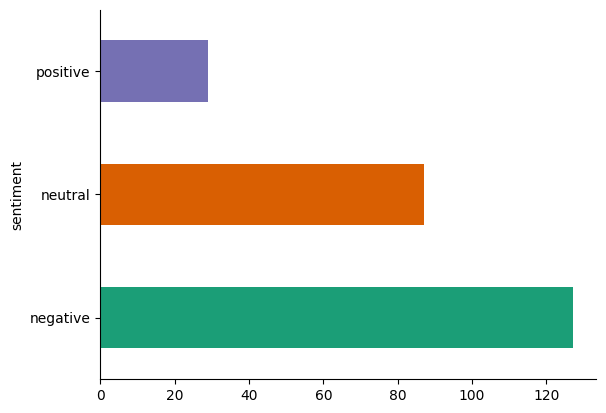

In [355]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##Implementasi Model RNN

####Split Data

In [356]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [357]:
# Encode label menjadi numerik
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [358]:
# Tokenisasi data teks menggunakan tokenizer Keras
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(df['full_text'].values)
X = tokenizer.texts_to_sequences(df['full_text'].values)
X = pad_sequences(X)

In [359]:
# Memisahkan data menjadi data latih dan data uji
Y = pd.get_dummies(df['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

###Model RNN

In [360]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# Membangun model RNN
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # Mengasumsikan 3 kelas sentimen: positif, negatif, netral
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih model
batch_size = 32
history = model.fit(X_train, Y_train, epochs=20, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2)

Epoch 1/20
7/7 - 7s - loss: 1.0811 - accuracy: 0.5361 - val_loss: 1.0447 - val_accuracy: 0.5918 - 7s/epoch - 974ms/step
Epoch 2/20
7/7 - 1s - loss: 1.0058 - accuracy: 0.6649 - val_loss: 0.9093 - val_accuracy: 0.5918 - 856ms/epoch - 122ms/step
Epoch 3/20
7/7 - 1s - loss: 0.8812 - accuracy: 0.5825 - val_loss: 0.8653 - val_accuracy: 0.5918 - 843ms/epoch - 120ms/step
Epoch 4/20
7/7 - 1s - loss: 0.7660 - accuracy: 0.6753 - val_loss: 0.8672 - val_accuracy: 0.6531 - 861ms/epoch - 123ms/step
Epoch 5/20
7/7 - 1s - loss: 0.6685 - accuracy: 0.7113 - val_loss: 0.8571 - val_accuracy: 0.6327 - 882ms/epoch - 126ms/step
Epoch 6/20
7/7 - 1s - loss: 0.5812 - accuracy: 0.7474 - val_loss: 0.8398 - val_accuracy: 0.6122 - 819ms/epoch - 117ms/step
Epoch 7/20
7/7 - 1s - loss: 0.5058 - accuracy: 0.7732 - val_loss: 0.8747 - val_accuracy: 0.5918 - 837ms/epoch - 120ms/step
Epoch 8/20
7/7 - 1s - loss: 0.4184 - accuracy: 0.8454 - val_loss: 0.9475 - val_accuracy: 0.6327 - 841ms/epoch - 120ms/step
Epoch 9/20
7/7 - 1s

###Evaluasi

In [361]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Membuat prediksi
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test, axis=1)

# Menghitung dan menampilkan akurasi
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Akurasi: {accuracy:.2f}")

# Menghitung dan menampilkan confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Menghitung dan menampilkan classification report
class_report = classification_report(true_classes, predicted_classes, target_names=['negative', 'neutral', 'positive'])
print("Classification Report:")
print(class_report)


2/2 [==============================] - 0s 18ms/step
Akurasi: 0.65
Confusion Matrix:
[[13 12  0]
 [ 2 19  0]
 [ 1  2  0]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.52      0.63        25
     neutral       0.58      0.90      0.70        21
    positive       0.00      0.00      0.00         3

    accuracy                           0.65        49
   macro avg       0.46      0.47      0.45        49
weighted avg       0.66      0.65      0.63        49



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [362]:
# Membuat prediksi
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Menampilkan hasil analisis sentimen
for i in range(len(X_test)):
    text = tokenizer.sequences_to_texts([X_test[i]])[0]
    sentiment = label_encoder.inverse_transform([predicted_classes[i]])[0]
    print(f"Teks: {text}")
    print(f"Sentimen: {sentiment}")
    print("----")

2/2 [==============================] - 0s 17ms/step
Teks: konten bau ketek di temlen teenyata udah nyampe di tiktok haha bule bali bau udah mau jd pandemi https t co j1jzt8gzr4
Sentimen: neutral
----
Teks: sebelumnya wna tanzania itu diamankan oleh satpol pp pemkab gianyar bali karena ditemukan dalam kondisi terlantar model wisatabali wnadibali https t co 53ef0nkjxz
Sentimen: negative
----
Teks: nothing fancy just pecel lele dan pulangnya minta digendong sembari ditemani gerimis kecil
Sentimen: negative
----
Teks: gubernur bali memberikan wacana jika wisatawan asing akan dilarang untuk menyewa motor tetapi terdapat juga penolakan akan hal tersebut bali gubernurbali bulebali bule wnadilarangmenyewamotor wisatawanbali viral hotnews mncupdate updaters https t co h7zumq9vis
Sentimen: neutral
----
Teks: menko luhut pemerintah terapkan karantina tiga hari bagi ppln mulai 1 maret https t co zgacjoenjp bali ppln wisatawanbali karantina
Sentimen: negative
----
Teks: detikcom detikfinance gaji r

###Visualisasi Hasil

8/8 [==============================] - 0s 35ms/step


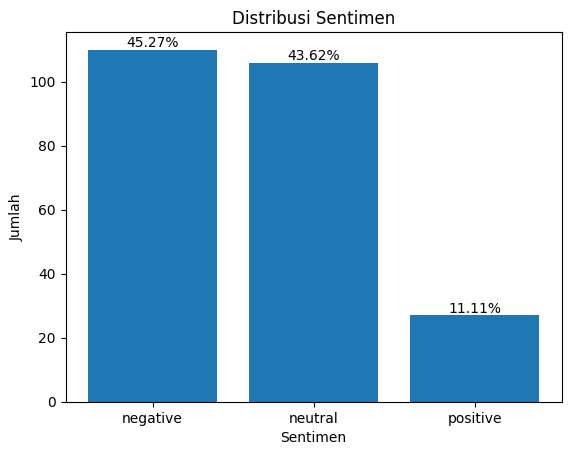

In [366]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Membuat prediksi untuk seluruh data
predictions = model.predict(X)
predicted_classes = np.argmax(predictions, axis=1)

# Menghitung jumlah setiap sentimen
unique, counts = np.unique(predicted_classes, return_counts=True)
sentiments = ['negative', 'neutral', 'positive']  # Ganti dengan nama sentimen Anda

# Membuat chart batang
plt.bar(sentiments, counts)
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Distribusi Sentimen')

# Menampilkan persentase di atas setiap batang
for i, count in enumerate(counts):
    percentage = (count / np.sum(counts)) * 100
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.show()